# Задание 2. Обучение модели. 

Требуется обучить модель на основе SVM для распознавания рукописных цифр из набора MNIST. 

Набор данных MNIST можно загрузить из пакета keras.  

В качестве модели применяется LinearSVC. В качестве вектора признаков можно взять линеаризованное изображение, значения элементов от 0 (черный) до 1 (белый). 

Результатом второго задания является записная книжка Python с подготовкой данных, процессом обучения, ручной проверкой качества распознавания на нескольких образцах и расчётом confusion matrix.  

1) Загружаем данные. 

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from random import randint 

#загрузка MNIST
from keras.datasets import mnist 
from sklearn.model_selection import train_test_split

# x_train, y_train - обучающая выборка (для обучение модели на основе SVC)
# test_x, test_y - тестовая выборка (для тестирования уже обученной модели)
(x_train, y_train), (test_x, test_y) = mnist.load_data()

# копия тестового набора для ручной проверки
copy_test_x = test_x 

2) Подготовливаем данные.  

Отобразим элемент в качестве входных данных. 

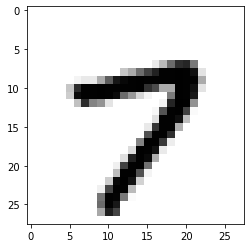

In [2]:
plt.figure()
i = randint(0,1000)
plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

В наборе имеют образцы 28 на 28 пикселей, следовательно переведём матрицу этого размера в вектор из 784 элементов 

In [3]:
num_pixels = x_train.shape[1] * x_train.shape[2]

# преобразование в float32
x_train, test_x = np.array(x_train, np.float32), np.array(test_x, np.float32)

# перевод матрицы в вектор
x_train, test_x = x_train.reshape([-1, 784]), test_x.reshape([-1, 784])

# нормализуем входные данные в [0,1]
# значение пикселя от 0 до 255
x_train = x_train / 255
test_x = test_x / 255

3) Начинаем обучать. 

Используем SVM - метод опорных элементов.

In [4]:
import sklearn.svm as svm
from sklearn.svm import LinearSVC
svm_model = svm.LinearSVC(dual = True,max_iter=100000)
svm_model.fit(x_train,y_train) 

LinearSVC(max_iter=100000)

4) Теперь проверим несколько образцов из данного набора. 

Проверка качества распознавания на образцах
---- Первый образец ---------------
Образец из тестовой выборки:   1
Образец из предсказывания:   1


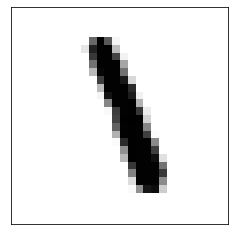

---- Второй образец ---------------
Образец из тестовой выборки:  2
Образец из предсказывания:  2


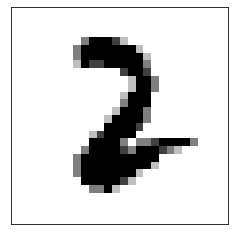

---- Третий образец ---------------
Образец из тестовой выборки:  6
Образец из предсказывания:  6


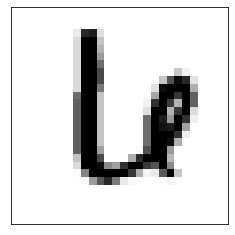

In [7]:
y_predict = svm_model.predict(test_x) 

plt.figure()
i1 = randint(0, 100)
i2 = randint(101, 1000)
i3 = randint(1001, 9999)
print("Проверка качества распознавания на образцах")

# ПЕРВЫЙ ОБРАЗЕЦ
print("---- Первый образец ---------------")
print("Образец из тестовой выборки:  ", test_y[i1])
print("Образец из предсказывания:  ", y_predict[i1])
plt.xticks([])
plt.yticks([])

# отображение изображения из тестовой выборки
plt.imshow(copy_test_x[i1], cmap = plt.cm.binary) 
plt.show()



# ВТОРОЙ ОБРАЗЕЦ
print("---- Второй образец ---------------")
print("Образец из тестовой выборки: ", test_y[i2])
print("Образец из предсказывания: ", y_predict[i2])
plt.xticks([])
plt.yticks([])

# отображение изображения из тестовой выборки
plt.imshow(copy_test_x[i2], cmap = plt.cm.binary) 
plt.show() 


# ТРЕТИЙ ОБРАЗЕЦ
print("---- Третий образец ---------------")
print("Образец из тестовой выборки: ", test_y[i3])
print("Образец из предсказывания: ", y_predict[i3])
plt.xticks([])
plt.yticks([])

# отображение изображения из тестовой выборки
plt.imshow(copy_test_x[i3], cmap = plt.cm.binary) 
plt.show()

5) Расчёт confusion matrix.  
Confusion matrix (матрица неточностей) — это таблица или диаграмма, показывающая точность прогнозирования классификатора в отношении двух и более классов. Прогнозы классификатора находятся на оси X, а результат (точность) — на оси Y.

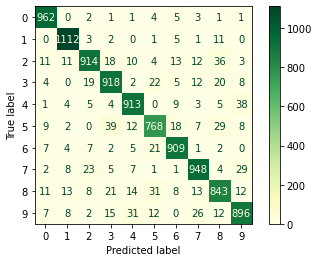

In [6]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_model, test_x, test_y, cmap=plt.cm.YlGn)